<a href="https://colab.research.google.com/github/samyukta-15/Air-Quality-Analysis/blob/main/jovian_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Analysis

The dataset for the project has been downloaded from Kaggle. We're trying to analyse the air quality in different cities of India using pandas for data manipulation and seaborn for data visualisation.

I express immense gratitude to the entire team of [Data Analysis with Python: Zero to Pandas](zerotopandas.com) for creating a beautifully structured course. The information is short and crisp. The assignments help implement the concepts explained in the course. Lastly, the articles linked for further information are super useful and helpful.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading the Dataset

The dataset has been downloaded from Kaggle as a .csv file

In [ ]:
air = pd.read_csv('/Users/samyuktavasaikar/Downloads/archive/city_day.csv')

In [ ]:
project_name = "zerotopandas-course-project"

In [ ]:
import jovian

jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samyukta-vasaikar/zerotopandas-course-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project


'https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project'

## Data Preparation and Cleaning

- We've glanced over the dataset by generating a random sample and using .sample()
- We explored the number of rows and columns by using .shape
- We understood the column names by using .columns
- We converted the necessary data into date-time format and numerical format
- We wanted to create a simplified AQI value, we needed to choose if we wanted to consider PM 2.5 or PM 10, hence, we checked the number of null and non-null values in each of the two columns, and went ahead with the column with the least number of null values 

.sample() is used to generate a random sample of rows from the given dataset

In [ ]:
air.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
14565,Guwahati,2020-06-16,16.03,26.82,1.89,9.27,5.92,1.60,0.40,15.63,24.49,0.00,NaN,NaN,34.0,Good
19495,Kolkata,2019-07-17,57.60,104.21,39.95,27.41,60.92,23.78,0.79,4.60,27.24,18.23,12.03,5.34,106.0,Moderate
9295,Chennai,2019-01-01,122.43,NaN,6.07,13.22,18.62,28.40,0.86,18.33,56.82,0.16,0.44,NaN,212.0,Poor
5627,Bengaluru,2018-08-26,18.42,60.03,21.34,18.03,31.57,23.73,0.93,7.07,13.19,0.29,1.83,NaN,70.0,Satisfactory
15536,Hyderabad,2017-08-16,20.12,56.17,7.78,12.73,6.88,4.92,0.18,4.97,32.41,0.41,2.13,0.84,63.0,Satisfactory
11477,Delhi,2018-06-02,52.60,154.66,12.65,29.28,35.13,41.24,0.98,9.08,60.12,1.51,3.67,0.00,183.0,Moderate
18175,Jorapokhar,2018-08-07,NaN,109.67,7.09,7.14,NaN,6.66,0.34,21.87,40.13,NaN,NaN,NaN,113.0,Moderate
22127,Mumbai,2015-09-30,NaN,NaN,NaN,NaN,96.75,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
135,Ahmedabad,2015-05-16,129.58,NaN,21.23,28.79,45.40,NaN,21.23,17.66,34.42,20.53,85.73,11.56,577.0,Severe
366,Ahmedabad,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


.shape is used to understand the total number of rows and columns in the given dataset

In [ ]:
air.shape

# the dataset has 29531 rows and 16 columns

(29531, 16)

.columns is used to have a look at all the column names in the dataset

In [ ]:
air.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

pd.to_datetime is used to convert the given data into date-time format

In [ ]:
air['Date'] = pd.to_datetime(air.Date)

pd.to_numeric is used to convert given data into numerical format to implement calculations easily

In [ ]:
air['PM2.5'] = pd.to_numeric(air['PM2.5'], errors='coerce')
air['PM10'] = pd.to_numeric(air.PM10, errors='coerce')
air['NO'] = pd.to_numeric(air.NO, errors='coerce')
air['NO2'] = pd.to_numeric(air.NO2, errors='coerce')
air['NOx'] = pd.to_numeric(air.NOx, errors='coerce')
air['NH3'] = pd.to_numeric(air.NH3, errors='coerce')
air['CO'] = pd.to_numeric(air.CO, errors='coerce')
air['SO2'] = pd.to_numeric(air.SO2, errors='coerce')
air['O3'] = pd.to_numeric(air.O3, errors='coerce')
air['Benzene'] = pd.to_numeric(air.Benzene, errors='coerce')
air['Toluene'] = pd.to_numeric(air.Toluene, errors='coerce')
air['Xylene'] = pd.to_numeric(air.Xylene, errors='coerce')
air['AQI'] = pd.to_numeric(air.AQI, errors='coerce')

isnull().sum() is used to calculate the total number of null values

notnull().sum() is used to calculate the total number of non null values

In [ ]:
null_PM2 = air['PM2.5'].isnull().sum()

null_PM10 = air['PM10'].isnull().sum()

not_null_PM2 = air['PM2.5'].notnull().sum()

not_null_PM10 = air['PM10'].notnull().sum()

print(f'No. of null values in the PM2.5 column = {null_PM2}\nNo. of null values in the PM10 column = {null_PM10}\n')

print(f'No. of non null values in the PM2.5 column = {not_null_PM2}\nNo. of non null values in the PM10 column = {not_null_PM10}\n')

No. of null values in the PM2.5 column = 4598
No. of null values in the PM10 column = 11140

No. of non null values in the PM2.5 column = 24933
No. of non null values in the PM10 column = 18391



In [ ]:
# create a new column 

air['new_aqi'] = air['PM2.5'] + air['CO'] + air['O3']

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samyukta-vasaikar/zerotopandas-course-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project


'https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project'

## Exploratory Analysis and Visualization

- We've computed the mean, sum, min, max by using .describe()
- We've visualised the data using data visualisation libraries

.info() will display the number of non-null values in the rows and their datatypes

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  new_aqi     23819 non-

.describe() implements statistical functions like mean, standard deviation, minimum and maximum value on the data

In [ ]:
air.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,new_aqi
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,23819.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,104.954355
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,72.637912
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,1.350000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,56.855000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,88.100000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,129.705000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,980.820000


'air_pollutants' dataframe is a subset of the primary 'air' dataframe. Hence, we've chosen columns that contain data about the pollutants i.e column no.2 (PM2.5) to the third last column (Xylene)

We've plotted a heatmap that **depicts the corelation between the pollutants**, annotation = True, hence the co-relation values are visible on the heatmap.

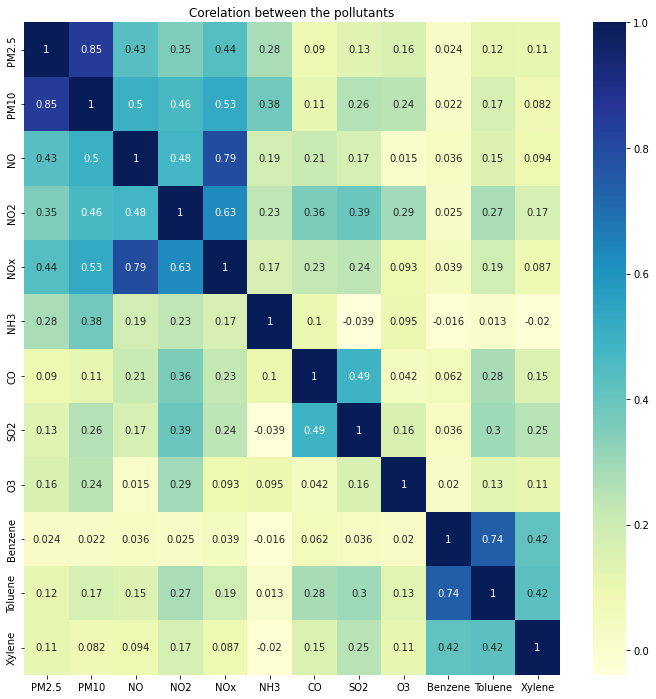

In [ ]:
# heatmap to display corelation between the pollutants

air_pollutants = air[air.columns[2:-3]]

plt.figure(figsize=(12,12))
plt.title('Corelation between the pollutants')

dataplot = sns.heatmap(air_pollutants.corr(), cmap="YlGnBu", annot=True)

'city_pollutants' dataframe contains the mean value of each pollutant in each city thereby giving a bird-eye view of the pollutant levels in each city. We've plotted a **stacked bar graph to display the city wise pollutant distribution.**

Delhi has the highest pollution levels and Aizawi has the lowest pollution levels in India.

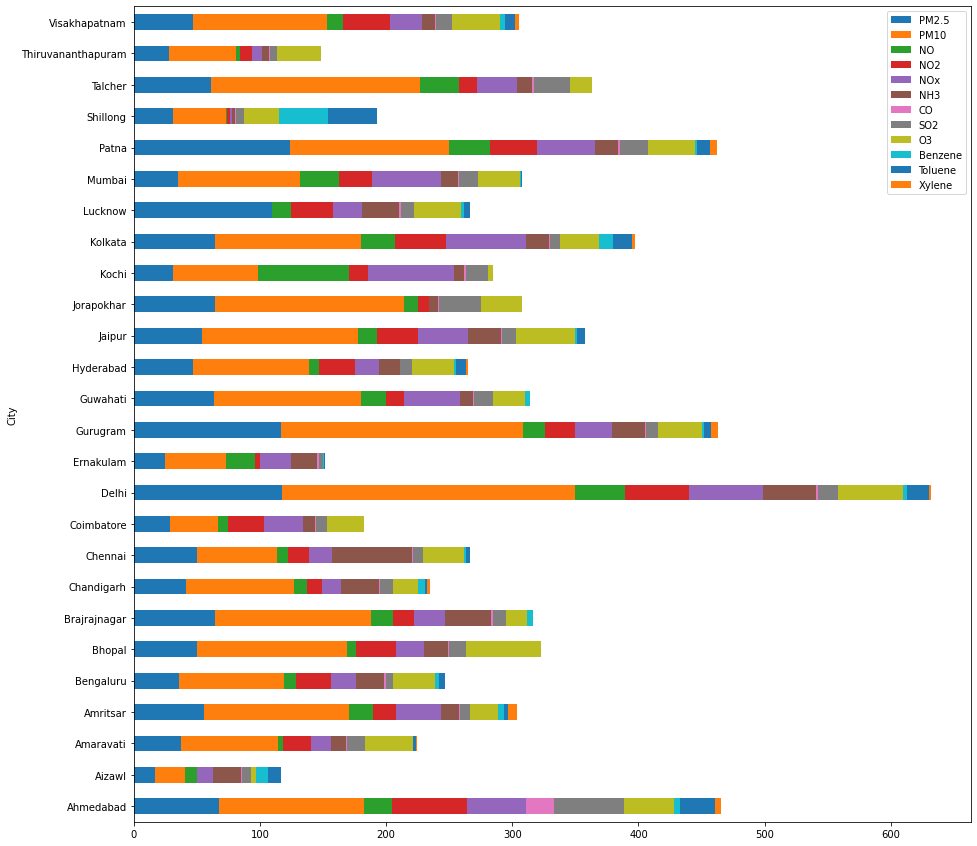

In [ ]:
# stacked bar graph to display the city wise pollutant distribution

city_pollutants = air_pollutants.groupby(air.City).mean()

city_pollutants.plot(figsize=(15,15), kind='barh', stacked=True);

'air_mumbai' contains all the pollutant levels data for the city of Mumbai. We've created two new columns (Year and Month) to filter out the provided data. pd.DatetimeIndex() is used to access the month and year from the Date column.

'air_mum_2019' contains all the pollutant levels data for the city of Mumbai for the year 2019.

In [ ]:
air_mumbai = air[air.City == 'Mumbai']

air_mumbai['Year'] = pd.DatetimeIndex(air_mumbai.Date).year

air_mumbai['Month'] = pd.DatetimeIndex(air_mumbai.Date).month

air_mum_2019 = air_mumbai[air_mumbai.Year == 2019]

/var/folders/jz/hgxvtpbn5tnbbbp99t3_glhw0000gn/T/ipykernel_43726/1372945782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_mumbai['Year'] = pd.DatetimeIndex(air_mumbai.Date).year
/var/folders/jz/hgxvtpbn5tnbbbp99t3_glhw0000gn/T/ipykernel_43726/1372945782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_mumbai['Month'] = pd.DatetimeIndex(air_mumbai.Date).month


We've plotted a **line graph to display AQI index in the year 2019 in Mumbai**. The line graph decreases from January to September and then starts increasing gradually from September to December.

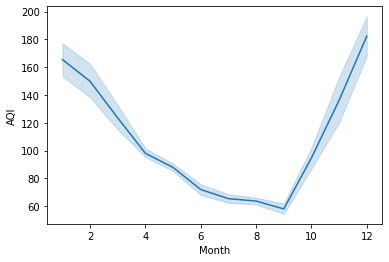

In [ ]:
# line graph to display AQI index in the year 2019 in Mumbai

data = air_mum_2019
  
sns.lineplot(y="AQI", x="Month", data=data)
plt.show()

air_mumbai contains all the pollutant levels data for the city of Mumbai. We've created two new columns (Year and Month) to filter out the provided data. pd.DatetimeIndex() is used to access the month and year from the Date column.

air_mum_2020 contains all the pollutant levels data for the city of Mumbai for the year 2020.

In [ ]:
air_mumbai = air[air.City == 'Mumbai']

air_mumbai['Year'] = pd.DatetimeIndex(air_mumbai.Date).year

air_mumbai['Month'] = pd.DatetimeIndex(air_mumbai.Date).month

air_mum_2020 = air_mumbai[air_mumbai.Year == 2020]

/var/folders/jz/hgxvtpbn5tnbbbp99t3_glhw0000gn/T/ipykernel_43726/702836387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_mumbai['Year'] = pd.DatetimeIndex(air_mumbai.Date).year
/var/folders/jz/hgxvtpbn5tnbbbp99t3_glhw0000gn/T/ipykernel_43726/702836387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_mumbai['Month'] = pd.DatetimeIndex(air_mumbai.Date).month


We've plotted a **line graph to display AQI index in the year 2020 in Mumbai.** The line graph gradually decreases from the month of January 2020 to July 2020.

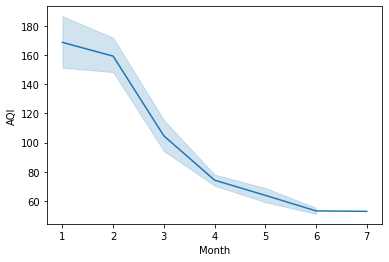

In [ ]:
# line graph to display AQI index in the year 2020 in Mumbai

data = air_mum_2020
  
sns.lineplot(y="AQI", x="Month", data=data)
plt.show()

We've plotted a line graph to **display PM2.5 levels in the year 2020 in Mumbai.** The line graph gradually decreases from the month of January to July.

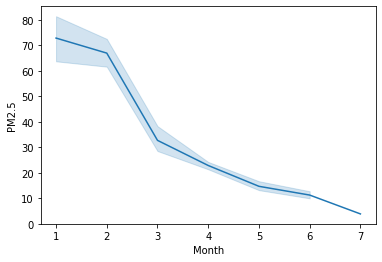

In [ ]:
# line graph to display PM2.5 levels in the year 2020 in Mumbai

data = air_mum_2020
  
sns.lineplot(y="PM2.5", x="Month", data=data)
plt.show()

We've plotted a **line graph to display NOx levels in the year 2020 in Mumbai.** The line graph increases from January to February, decreases till April and then gradually increases from April to July.

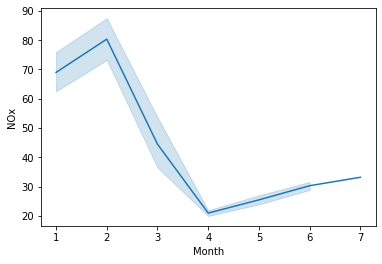

In [ ]:
# line graph to display NOx levels in the year 2020 in Mumbai

data = air_mum_2020
  
sns.lineplot(y="NOx", x="Month", data=data)
plt.show()

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samyukta-vasaikar/zerotopandas-course-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project


'https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project'

## Asking and Answering Questions

## Q1. Which city has the highest AQI index?

#### As per the bar graph below, Ahmedabad has the highest AQI index

## Q2. Which city has the lowest AQI index?

#### As per the bar graph below, Aizawi has the lowest AQI index

The bar graph shown below displays the **city-wise AQI index values.**

The AQI index values are plotted on the X axis and the city names are plotted on Y axis.

We've used seaborn to plot the given bar plot.

Ahmedabad has the highest AQI index and Aizawi has the lowest AQI index.

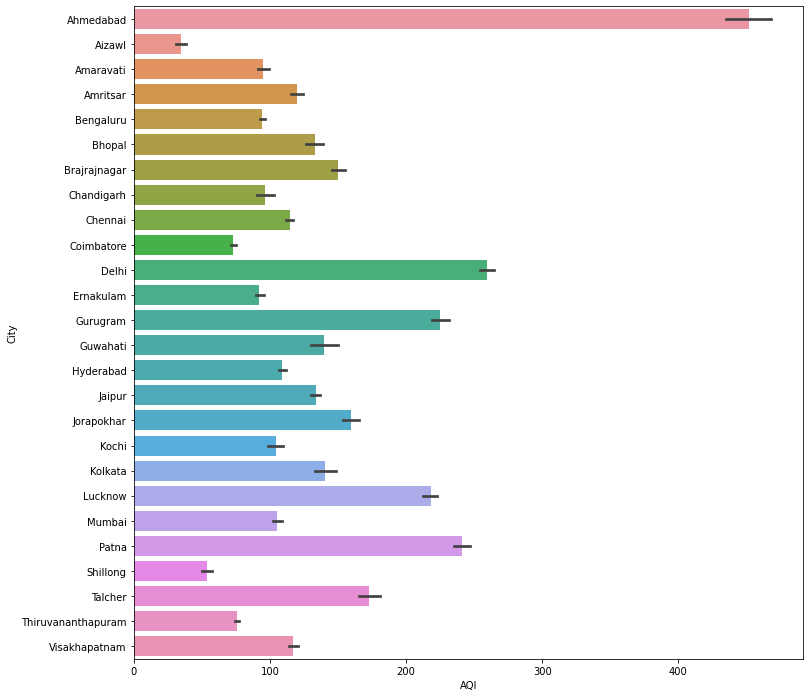

In [ ]:
# bar graph of city wise AQI index values

plt.figure(figsize=(12,12))
sns.barplot(y=air.City, x=air.AQI);

## Q3. Which pollutant contributes the most to pollution in India?

#### As per the bar graph below, PM10 contributes the most to pollution.

## Q4. Which pollutant contributes the least to pollution in India?

#### As per the bar graph below, CO contributes the least to pollution.

The bar graph shown below shows the **pollutant wise distribution in India.**

'pollutants' contains the mean values of the pollutant levels in all cities.

We've plotted the mean pollutant values on the x axis and the pollutant names on the y axis.

We've used seaborn to plot the given bar plot.

PM10 contributes the most to pollution and CO contributes the least to pollution.

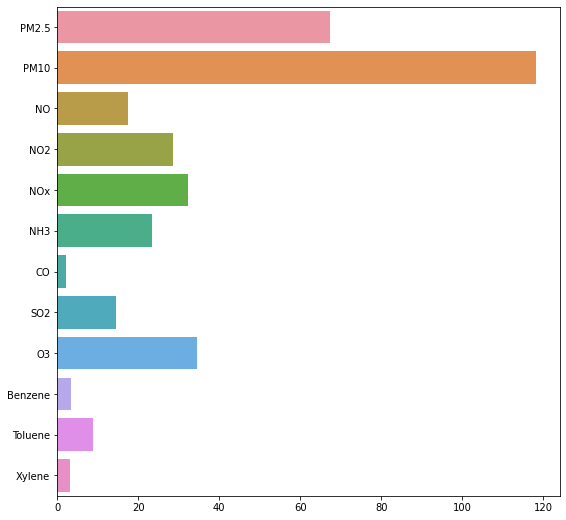

In [ ]:
# bar graph displaying pollutant wise distribution in India

plt.figure(figsize=(9,9))

pollutants = air_pollutants.mean()

sns.barplot(x=pollutants, y=pollutants.index);

## Q5. What trend can be observed using the below graph?

#### The AQI index lies between 50 and 250 and it has declined over the months in 2020.

The scatter graph shown below shows the **AQI index monthwise distribution in the year 2020 in Mumbai.**

We've plotted the timeperiod i.e months of 2020 on the x axis and the AQI index on the y axis.

We've used seaborn to plot the given scatter plot.

The AQI index lies between 50 and 250 and it has declined steadily over the months in 2020.

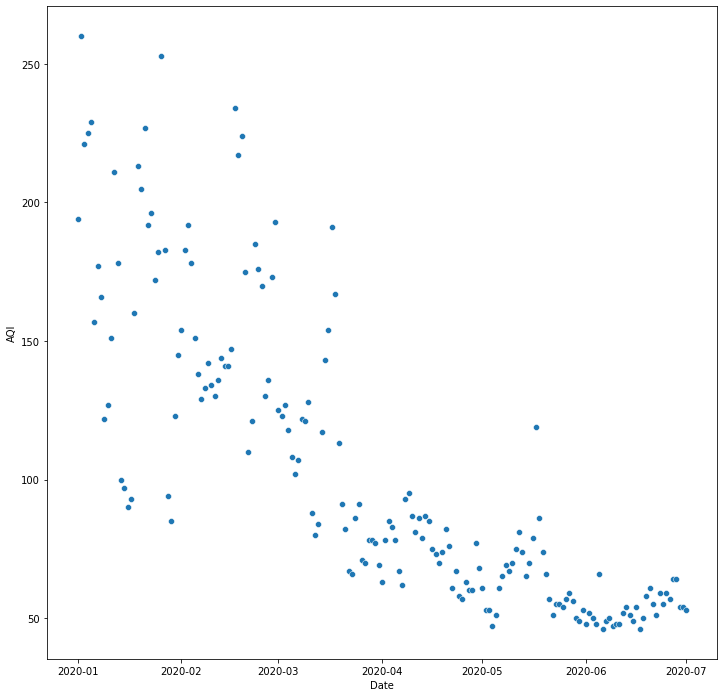

In [ ]:
# scatter plot to showcase monthwise AQI index distribution

plt.figure(figsize=(12,12))

sns.scatterplot(y="AQI", x="Date", data=air_mum_2020)
plt.show()

## Q6. Which pollutant is the majorly responsible for pollution in Mumbai?

#### PM 10 is the major pollutant that is responsible for pollution in Mumbai

The bar graph shown below shows the **pollutant wise distribution in Mumbai from 2018 to 2020**

'mumbai_pollutants' represents the mean value of each pollutant given in the dataset.

We've plotted the mean of pollutant levels on the x axis and the pollutant names on the y axis.

We've used seaborn to plot the given scatter plot.

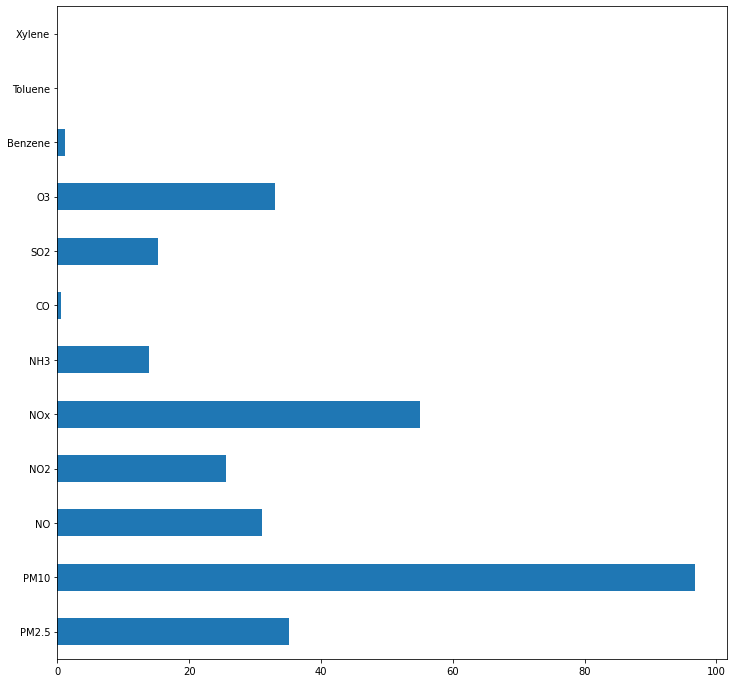

In [ ]:
# bar graph representing pollutant wise distribution in mumbai

mumbai_pollutants = air_mumbai.iloc[:, 2:14].mean()

mumbai_pollutants.plot(figsize=(12,12), kind='barh');

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "samyukta-vasaikar/zerotopandas-course-project" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project


'https://jovian.ai/samyukta-vasaikar/zerotopandas-course-project'

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:

- The dataset includes information about the different levels of pollutants in different cities of India.
- The dataset could include more data about PM10 pollutant levels as it is a major contributor to pollution in general. Also, information has been recorded from 2018 to the inital 7 months of 2020.
- In 2019, the AQI index was increasing linearly in Mumbai.
- However, there has been a major decline in the AQI index of Mumbai due to reduced pollution levels during the pandemic.
- NOx levels declined and then started increasing from April 2020 to July 2020 despite the pandemic.
- Ahmedabad has the highest AQI index and Aizawi has the lowest AQI index.
- The AQI index of Mumbai lies between 50 and 250 in the year 2020.
- PM10 is majorly responsible and CO is the least responsible for pollution in India.

## References and Future Work

Conduct an in-depth research by analysing the pollutant levels in different cities and understand ways to solve the problem of air pollution efficiently.

* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>